# CMPS 320
## Lab 2:  Principal Component Analysis

We illustrate the use of PCA on the USArrests data set. 

For each of the 50 states in the United States, the data set contains the number of arrests
per 100, 000 residents for each of three crimes: Assault, Murder, and Rape.

We also record UrbanPop (the percent of the population in each state living
in urban areas). The principal component score vectors have length $n = 50$,
and the principal component loading vectors have length $p = 4$. 

PCA was performed after standardizing each variable to have mean zero and standard
deviation one.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics  

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
# Load Data and Inspect 
USArrests = pd.read_csv('USArrests.csv', index_col=0)
print(USArrests.info())
USArrests.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [4]:
# Computes a summary of statistics USArrests
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### A simple PCA Implementation

Acquire PCA through direct standardization, covariance matrix, and eigen decomposition

In [5]:
def simple_PCA(data_mat):
    data_mat_standardized = preprocessing.scale(data_mat, axis=0)  # standardize (zero mean, sd=1)
    cov_mat = np.cov(data_mat_standardized, rowvar=False)   # Covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)          # eigen value/vector decomposition 
    idx = np.argsort(np.abs(eigen_vals))[::-1]  # sort abs(eigenvalue) from largest, & return args
    pc_loadings = eigen_vecs[:,idx]      # re-arrange eigenvectors along the magniture of eigenvalues 
    pc_scores = np.dot(data_mat_standardized, pc_loadings)     # Compute Principal Component Score 
    return(eigen_vals[idx], pc_loadings, pc_scores)     # Returns 3 tuple: eigen values, eigen vectors/loadings, PC scores 


In [6]:
# Perform PCA on 'USArrests' with 'simple_PCA' 
eigen_vals, eigen_vecs, pc_scores = simple_PCA(USArrests)   # eigen_vecs : PCs (loadings)

In [7]:
# Eigen values
eigen_vals

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [8]:
# Eigen Vectors
eigen_vecs

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [9]:
print(pc_scores.shape)
pc_scores[:,0] # First PC score

(50, 4)


array([ 0.98556588,  1.95013775,  1.76316354, -0.14142029,  2.52398013,
        1.51456286, -1.35864746,  0.04770931,  3.01304227,  1.63928304,
       -0.91265715, -1.63979985,  1.37891072, -0.50546136, -2.25364607,
       -0.79688112, -0.75085907,  1.56481798, -2.39682949,  1.76336939,
       -0.48616629,  2.10844115, -1.69268181,  0.99649446,  0.69678733,
       -1.18545191, -1.26563654,  2.87439454, -2.38391541,  0.18156611,
        1.98002375,  1.68257738,  1.12337861, -2.99222562, -0.22596542,
       -0.31178286,  0.05912208, -0.88841582, -0.86377206,  1.3207238 ,
       -1.98777484,  0.99974168,  1.35513821, -0.55056526, -2.80141174,
       -0.09633491, -0.21690338, -2.10858541, -2.07971417, -0.62942666])

### PCA using scikit-learn

In [10]:
USArrests_standardized = preprocessing.scale(USArrests, axis=0)  # standardization 

# Instantiate PCA estimator 
pca = decomposition.PCA()
# fit : Run PCA
USArrests_PC = pca.fit(USArrests_standardized)

In [11]:
# See what attributes/operations are there in a PC object
vars(USArrests_PC)

{'n_components': None,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'n_features_in_': 4,
 '_fit_svd_solver': 'full',
 'mean_': array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16]),
 'noise_variance_': 0.0,
 'n_samples_': 50,
 'n_features_': 4,
 'components_': array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
        [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
        [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
        [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]]),
 'n_components_': 4,
 'explained_variance_': array([2.53085875, 1.00996444, 0.36383998, 0.17696948]),
 'explained_variance_ratio_': array([0.62006039, 0.24744129, 0.0891408 , 0.04335752]),
 'singular_values_': array([11.13607107,  7.0347891 ,  4.22234047,  2.94474182])}

In [12]:
# The principal component loading vectors, φ1 and φ2, for the USArrests data.

PCs = pd.DataFrame(USArrests_PC.components_.T, index=USArrests.columns,
            columns=['PC1', 'PC2','PC3','PC4'])

print(eigen_vecs)   # PC loadings obtained directly with simple_PCA'
PCs                 # PC loadings saved with Scikit-learn

[[ 0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [ 0.58318363  0.1879856  -0.26814843 -0.74340748]
 [ 0.27819087 -0.87280619 -0.37801579  0.13387773]
 [ 0.54343209 -0.16731864  0.81777791  0.08902432]]


,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


**Note**: The two produced the same results. The principal component is the same even if the sign is changed.

In [13]:
# Fit the PCA model and transform data to get the principal components

# Instantiate PCA estimator 
pca = decomposition.PCA()
df_plot = pd.DataFrame(pca.fit_transform(USArrests_standardized), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=USArrests.index)
df_plot

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465
Connecticut,-1.358647,-1.088928,-0.643258,-0.118469
Delaware,0.047709,-0.325359,-0.718633,-0.881978
Florida,3.013042,0.039229,-0.576829,-0.096285
Georgia,1.639283,1.278942,-0.342460,1.076797


#### Obtaining the PC Score

In [14]:
# Directly obtained by Covariance Matrix & Eigen value/vector method using 'simple_PCA'
pc_scores[:,0]

array([ 0.98556588,  1.95013775,  1.76316354, -0.14142029,  2.52398013,
        1.51456286, -1.35864746,  0.04770931,  3.01304227,  1.63928304,
       -0.91265715, -1.63979985,  1.37891072, -0.50546136, -2.25364607,
       -0.79688112, -0.75085907,  1.56481798, -2.39682949,  1.76336939,
       -0.48616629,  2.10844115, -1.69268181,  0.99649446,  0.69678733,
       -1.18545191, -1.26563654,  2.87439454, -2.38391541,  0.18156611,
        1.98002375,  1.68257738,  1.12337861, -2.99222562, -0.22596542,
       -0.31178286,  0.05912208, -0.88841582, -0.86377206,  1.3207238 ,
       -1.98777484,  0.99974168,  1.35513821, -0.55056526, -2.80141174,
       -0.09633491, -0.21690338, -2.10858541, -2.07971417, -0.62942666])

In [15]:
# We  get it all at once from the data matrix using fit_transform()
PC_scores_sk = pca.fit_transform(USArrests_standardized)
PC_scores_sk[:,0] # Retrieved from sckikit-learn's PCA

array([ 0.98556588,  1.95013775,  1.76316354, -0.14142029,  2.52398013,
        1.51456286, -1.35864746,  0.04770931,  3.01304227,  1.63928304,
       -0.91265715, -1.63979985,  1.37891072, -0.50546136, -2.25364607,
       -0.79688112, -0.75085907,  1.56481798, -2.39682949,  1.76336939,
       -0.48616629,  2.10844115, -1.69268181,  0.99649446,  0.69678733,
       -1.18545191, -1.26563654,  2.87439454, -2.38391541,  0.18156611,
        1.98002375,  1.68257738,  1.12337861, -2.99222562, -0.22596542,
       -0.31178286,  0.05912208, -0.88841582, -0.86377206,  1.3207238 ,
       -1.98777484,  0.99974168,  1.35513821, -0.55056526, -2.80141174,
       -0.09633491, -0.21690338, -2.10858541, -2.07971417, -0.62942666])

The two results are the same. 

**Note**: The two results are the same, with sign reversed.

### Biplot 

The figure above plots the first two principal components of the USArrests data set. The figure represents both the principal component scores and the loading vectors in a single biplot display.

A biplot is plot which aims to represent both the observations and variables of a matrix of multivariate data on the same plot. 

Text(0, 0.5, "2'nd Principal Component loading vectors")

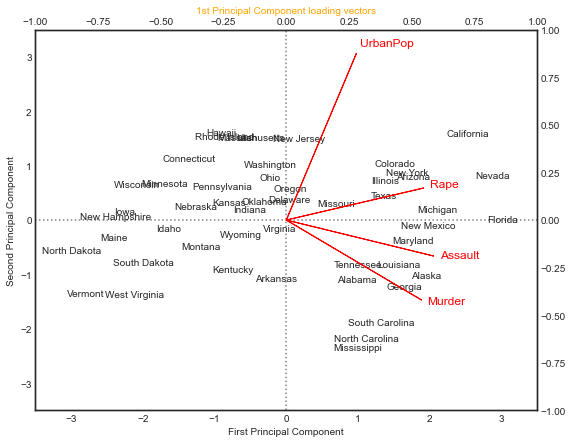

In [16]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')


# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.05  
for i in PCs[['PC1', 'PC2']].index:
    ax2.annotate(i, (PCs.PC1.loc[i]*a, -PCs.PC2.loc[i]*a), color='red', size =12)
    

# Plot vectors
ax2.arrow(0,0,PCs.PC1[0], -PCs.PC2[0], color='red')
ax2.arrow(0,0,PCs.PC1[1], -PCs.PC2[1], color='red')
ax2.arrow(0,0,PCs.PC1[2], -PCs.PC2[2], color='red')
ax2.arrow(0,0,PCs.PC1[3], -PCs.PC2[3], color='red');

ax2.set_xlabel('1st Principal Component loading vectors', color='orange')
ax2.set_ylabel("2'nd Principal Component loading vectors", color='orange')

Figure Description: 

The state names represent the scores for the first two principal components. The loading for Rape on the first component is 0.54, and its loading on the second principal component 0.17 (the word Rape is centered at the point (0.54, 0.17)). This figure is known as a biplot, because it displays both the principal component scores and the principal component loadings.

We see that the first loading vector places approximately equal weight on Assault, Murder, and Rape, with much less weight on UrbanPop. Hence this component roughly corresponds to a measure of overall
rates of serious crimes.

The second loading vector places most of its weight on UrbanPop and much less weight on the other three features. Hence, this component roughly corresponds to the level of urbanization of the state.

Overall, we see that the crime-related variables (Murder, Assault, and Rape) are located close to each other, and that the UrbanPop variable is far from the other three. This indicates that the crime-related variables are correlated
with each other i.e. states with high murder rates tend to have high assault and rape rates—and that the UrbanPop variable is less correlated with the other three.

### Proportion of Variance Explained

Let's look at the variance (PVE) of the raw data as explained by Principal Component Loading.

In [20]:
USArrests_PC.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

From the above reuslts, we see that the first principal component explains 62.0\% ofthe variance in the data, and the next principal component explains 24.7\% of the variance. 
Together, the first two principal components explain almost 87\% of the variance in the data, and the last two principal components explain only 13% of the variance.

This means that the figure above provides a pretty accurate summary of the data using just two dimensions.

Standard Deviations of Principal Components: 
 [1.5908673  1.00496987 0.6031915  0.4206774 ]


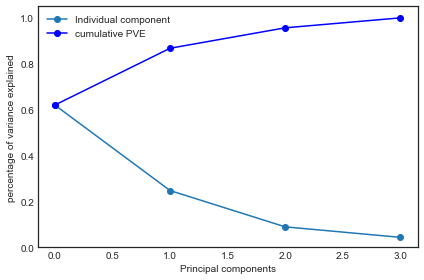

In [21]:
print("Standard Deviations of Principal Components: \n", np.sqrt(USArrests_PC.explained_variance_))

# Percentage of Variance Explained (PVE) by each PC:
plt.figure(figsize=(6, 4))
plt.ylim(0, 1.05)

plt.plot(USArrests_PC.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(np.cumsum(USArrests_PC.explained_variance_ratio_), 'bo-', label='cumulative PVE')

plt.ylabel('percentage of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

The PVE of each principal component, as well as the cumulative PVE, is shown.